In [0]:
# Download data - please only run this once
import urllib.request
import zipfile
import os

print("Starting download ...")
urls = [
    "https://github.com/aihack20/shell_challenge/releases/download/data/clean_dataset.zip",
    "https://github.com/aihack20/shell_challenge/releases/download/data/raw_dataset.zip",
]
os.makedirs("shell_data", exist_ok=True)
for url in urls:
    with urllib.request.urlopen(url) as src:
        with open("tmp.zip", "wb") as dest:
            dest.write(src.read())
    print("Unpacking archive ...")
    with zipfile.ZipFile("tmp.zip") as f:
        f.extractall("shell_data")
print("Done!")

Starting download ...
Unpacking archive ...
Unpacking archive ...
Done!


In [2]:
# Run this ONLY IF YOU USE GOOGLE COLAB
google_drive_dir = "AIHACK"

try:
    from google.colab import drive
    drive.mount("/content/drive")
    directory = "working_dir"
    if not os.path.exists(directory):
      os.symlink(os.path.join("drive", "My Drive", google_drive_dir), directory)
except ModuleNotFoundError as err:
    print("This only works on Google Colab. Skipping ...")

KeyboardInterrupt: ignored

In [0]:
%pip install pandas matplotlib

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
# Load the data (will take a short while)
clean_data = pd.read_csv("shell_data/clean_dataset.csv")
raw_data = pd.read_csv("shell_data/raw_dataset.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

In [0]:
clean_data

,Temperature Indicating 0,Flow Rate Difference 1,Flow Rate Indicating 2,Flow Rate Indicating 3,Flow Rate Indicating 4,Flow Rate Indicating 5,Flow Rate Indicating 6,Flow Rate Indicating 7,Flow Rate Indicating 8,Flow Rate Transmitting 9,Flow Rate Transmitting 10,Flow Rate Transmitting 11,Flow Rate Transmitting 12,Flow Rate Actuating Element 13,Flow Rate Solenoid 14,Gauging Difference 15,Time Control Unknown 16,Level Indicating 17,Level Indicating 18,Pressure Controller 19,Pressure Difference 20,Pressure Difference 21,Pressure Difference 22,Pressure Difference 23,Pressure Difference 24,Pressure Difference 25,Pressure Difference 26,Pressure Difference 27,Pressure Difference 28,Pressure Difference 29,Pressure Difference 30,Pressure Difference 31,Pressure Difference 32,Pressure Indicating 33,Pressure Indicating 34,Pressure Indicating 35,Pressure Indicating 36,Pressure Indicating 37,Pressure Indicating 38,Pressure Indicating 39,...,Unknown Solenoid 323,Unknown Solenoid 324,Unknown Solenoid 325,Unknown Solenoid 326,Unknown Solenoid 327,Classified Status 328,Classified Indicating 329,Classified Indicating 330,Classified Indicating 331,Classified Indicating 332,Classified Indicating 333,Classified Indicating 334,Classified Indicating 335,Classified Indicating 336,Unknown Indicating 337,Unknown Indicating 338,Unknown Indicating 339,Unknown Indicating 340,Unknown Indicating 341,Unknown Indicating 342,Flow Rate Difference 343,Flow Rate Indicating 344,Flow Rate Actuating Element 345,Level Emergency Action 346,Pressure Difference 347,Pressure Difference 348,Pressure Difference 349,Pressure Difference 350,Pressure Indicating 351,Pressure Indicating 352,Pressure Indicating 353,Pressure Emergency Action 354,Temperature Controller 355,Temperature Indicating 356,Temperature Indicating 357,Temperature Indicating 358,Temperature Indicating 359,Temperature Indicating 360,Pressure Emergency Action 361,original_index
0,96.026969,134.058575,3.016896,5.499815,27221.60098,72829.950470,227.437532,5.672353,8.660389,259.164053,259.250694,37.604181,32.045362,2.979267,82.339927,0.0,11069.00855,26.312438,2.968154,8.387354,1.561507,0.111407,0.040897,0.017575,-0.009179,0.158100,0.199423,0.002104,4.278127,7.522407,2.926254,17.305795,0.0,2.294762,84.671409,28.102212,85.162853,6.644328,9.880568,7.794782,...,4.774930,11.267856,12.018494,3.600354,4.474426,0.0,4954.638333,7049.545236,16.576476,2096.470083,149.445182,6740.707903,0.703729,0.007709,-0.050000,-0.115212,0.090000,0.08,0.030000,0.0,733.562696,2353.957861,0.000000,46.569746,0.310399,0.361983,0.529558,0.006196,2.292604,27.922524,44.119015,44.053790,29.662350,54.554506,64.945662,25.450283,63.617557,64.978109,43.724690,0
1,95.987510,134.592346,3.020742,5.600833,27179.00250,71681.450820,227.170568,5.670112,8.642001,262.580608,263.893577,37.654943,32.106802,2.966380,82.376430,0.0,11074.03344,26.263372,3.052990,8.304424,1.560687,0.111684,0.041069,0.017791,-0.016854,0.157064,0.199661,0.002104,4.281026,7.480112,2.857404,17.300145,0.0,2.291194,84.703689,28.082687,85.124370,6.632087,9.872420,7.795228,...,4.474426,11.711700,12.018494,3.159676,4.474426,0.0,4938.391538,7019.052236,16.608910,2080.638000,149.340074,6725.873754,0.703762,0.006887,-0.050000,-0.115066,0.090000,0.08,0.030000,0.0,736.089958,2358.574785,0.000000,46.572425,0.307906,0.357844,0.528139,0.008542,2.297546,27.966855,44.053370,44.047508,29.694455,54.828519,64.916624,25.474713,63.724127,65.082058,43.772990,1
2,96.099651,133.920536,3.013397,5.797500,27383.78150,72524.834580,226.903604,5.664165,8.644843,259.783251,260.150397,37.560544,32.005114,2.959470,82.291741,0.0,11065.93960,26.272370,2.999251,8.290051,1.556959,0.111551,0.040897,0.016814,-0.022455,0.156462,0.198392,0.002085,4.279762,7.473612,2.985811,17.305048,0.0,2.286761,84.749601,28.069216,85.139617,6.594814,9.862027,7.806693,...,4.474426,11.328209,12.018494,3.163318,4.474426,0.0,4939.808129,7039.833792,16.619297,2099.810181,149.180346,6742.504121,0.704539,0.012337,-0.050000,-0.118318,0.090000,0.08,0.

In [0]:
import numpy as np
var = pd.DataFrame(clean_data.std())
var.columns = ["variance"]

In [0]:
var.drop('original_index',inplace=True)

In [0]:
var.sort_values(by=['variance'])

,variance
Pressure Difference 27,0.000955
Pressure Difference 234,0.000956
Pressure Difference 32,0.001145
Pressure Difference 22,0.003547
Pressure Difference 23,0.005789
...,...
Flow Rate Transmitting 217,14466.969569
Flow Rate Summation 214,15016.768586
Flow Rate Indicating 4,111710.440459
Flow Rate Indicating 5,315341.347302


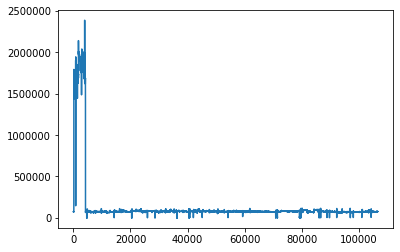

In [0]:
#plt.plot(clean_data['Flow Rate Indicating 213'])

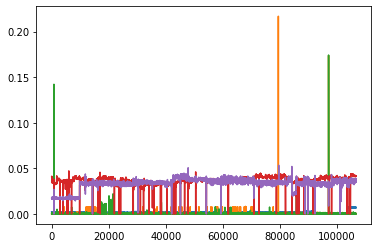

In [0]:
#plt.plot(clean_data['Pressure Difference 27'])
#plt.plot(clean_data['Pressure Difference 234'])
#plt.plot(clean_data['Pressure Difference 32'])
#plt.plot(clean_data['Pressure Difference 22'])
#plt.plot(clean_data['Pressure Difference 23'])

# Trailing Variance

In [0]:
Trailing_var = pd.DataFrame() 
Trailing_var['Original index'] = clean_data['original_index']

In [0]:
for i in range(len(clean_data.columns)-1):
  Trailing_var[clean_data.columns[i]] = clean_data[clean_data.columns[i]].rolling(25).var()

In [0]:
Trailing_var

,Original index,Temperature Indicating 0,Flow Rate Difference 1,Flow Rate Indicating 2,Flow Rate Indicating 3,Flow Rate Indicating 4,Flow Rate Indicating 5,Flow Rate Indicating 6,Flow Rate Indicating 7,Flow Rate Indicating 8,Flow Rate Transmitting 9,Flow Rate Transmitting 10,Flow Rate Transmitting 11,Flow Rate Transmitting 12,Flow Rate Actuating Element 13,Flow Rate Solenoid 14,Gauging Difference 15,Time Control Unknown 16,Level Indicating 17,Level Indicating 18,Pressure Controller 19,Pressure Difference 20,Pressure Difference 21,Pressure Difference 22,Pressure Difference 23,Pressure Difference 24,Pressure Difference 25,Pressure Difference 26,Pressure Difference 27,Pressure Difference 28,Pressure Difference 29,Pressure Difference 30,Pressure Difference 31,Pressure Difference 32,Pressure Indicating 33,Pressure Indicating 34,Pressure Indicating 35,Pressure Indicating 36,Pressure Indicating 37,Pressure Indicating 38,...,Unknown Solenoid 322,Unknown Solenoid 323,Unknown Solenoid 324,Unknown Solenoid 325,Unknown Solenoid 326,Unknown Solenoid 327,Classified Status 328,Classified Indicating 329,Classified Indicating 330,Classified Indicating 331,Classified Indicating 332,Classified Indicating 333,Classified Indicating 334,Classified Indicating 335,Classified Indicating 336,Unknown Indicating 337,Unknown Indicating 338,Unknown Indicating 339,Unknown Indicating 340,Unknown Indicating 341,Unknown Indicating 342,Flow Rate Difference 343,Flow Rate Indicating 344,Flow Rate Actuating Element 345,Level Emergency Action 346,Pressure Difference 347,Pressure Difference 348,Pressure Difference 349,Pressure Difference 350,Pressure Indicating 351,Pressure Indicating 352,Pressure Indicating 353,Pressure Emergency Action 354,Temperature Controller 355,Temperature Indicating 356,Temperature Indicating 357,Temperature Indicating 358,Temperature Indicating 359,Temperature Indicating 360,Pressure Emergency Action 361
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106705,131899,0.003650,0.138283,0.000016,0.0,95001.175992,51.386532,0.823448,4.590347e-07,0.002703,6.092506,6.561471,0.002302,0.

In [0]:
max_trailing = np.column_stack((np.nanmax(Trailing_var.iloc[:,1:], axis=0),np.array(clean_data.columns)[:-1]))
max_trailing = pd.DataFrame(max_trailing)
max_trailing.columns = ['max_trailing_var','features']

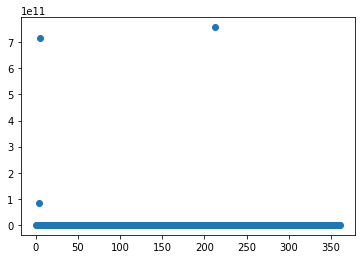

In [0]:
#plt.scatter(range(len(max_trailing['max_trailing_var'])),max_trailing['max_trailing_var'])

In [0]:
max_trailing.sort_values(by=['max_trailing_var'],ascending=False)

,max_trailing_var,features
213,7.57363e+11,Flow Rate Indicating 213
5,7.16346e+11,Flow Rate Indicating 5
4,8.45318e+10,Flow Rate Indicating 4
217,1.47615e+09,Flow Rate Transmitting 217
214,9.28752e+08,Flow Rate Summation 214
...,...,...
232,0.000524708,Pressure Difference 232
350,0.000383613,Pressure Difference 350
22,0.000371285,Pressure Difference 22
23,0.000233576,Pressure Difference 23


Text(0.5, 1.0, 'The correlation coefficient between the two features is 0.989489')

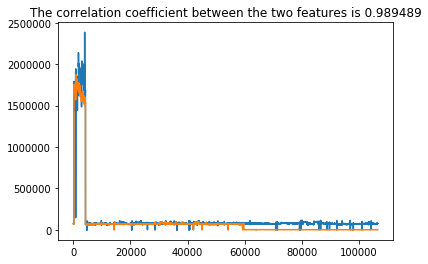

In [0]:
#import numpy.ma as ma
#plt.plot(clean_data['Flow Rate Indicating 213'])
#plt.plot(clean_data['Flow Rate Indicating 5'])
#plt.title('The correlation coefficient between the two features is %f' % (ma.corrcoef(ma.masked_invalid(clean_data['Flow Rate Indicating 213']),
                                                                                      #ma.masked_invalid(clean_data['Flow Rate Indicating 5']))[0][1]))

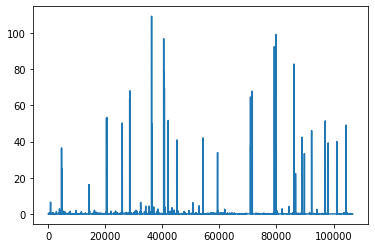

In [0]:
#plt.plot(Trailing_var['Unknown Solenoid 325'])

In [0]:
new_Trailing_var =  Trailing_var.dropna()
#new_Trailing_var

In [0]:
original_index= new_Trailing_var['Original index'][1:] 
final_Trailing_var_percent = new_Trailing_var.iloc[:,1:].pct_change().fillna(0)
final_Trailing_var_percent = final_Trailing_var_percent.iloc[1:,:]
#final_Trailing_var_percent

In [0]:
res = pd.DataFrame() 
res['Index'] = np.array(final_Trailing_var_percent.index)
res['Original_index'] = np.array(original_index)
res

,Index,Original_index
0,25,25
1,26,26
2,27,27
3,28,28
4,29,29
...,...,...
103398,106705,131899
103399,106706,131900
103400,106707,131901
103401,106708,131902


In [0]:
for i in range(len(final_Trailing_var_percent.columns)):
  feature_up = np.where(final_Trailing_var_percent.iloc[:,i]>1,1,0)
  feature_down = np.where(final_Trailing_var_percent.iloc[:,i]<-0.4,-1,0)
  res[final_Trailing_var_percent.columns[i]] = feature_up+feature_down

In [0]:
res

,Index,Original_index,Temperature Indicating 0,Flow Rate Difference 1,Flow Rate Indicating 2,Flow Rate Indicating 3,Flow Rate Indicating 4,Flow Rate Indicating 5,Flow Rate Indicating 6,Flow Rate Indicating 7,Flow Rate Indicating 8,Flow Rate Transmitting 9,Flow Rate Transmitting 10,Flow Rate Transmitting 11,Flow Rate Transmitting 12,Flow Rate Actuating Element 13,Flow Rate Solenoid 14,Gauging Difference 15,Time Control Unknown 16,Level Indicating 17,Level Indicating 18,Pressure Controller 19,Pressure Difference 20,Pressure Difference 21,Pressure Difference 22,Pressure Difference 23,Pressure Difference 24,Pressure Difference 25,Pressure Difference 26,Pressure Difference 27,Pressure Difference 28,Pressure Difference 29,Pressure Difference 30,Pressure Difference 31,Pressure Difference 32,Pressure Indicating 33,Pressure Indicating 34,Pressure Indicating 35,Pressure Indicating 36,Pressure Indicating 37,...,Unknown Solenoid 322,Unknown Solenoid 323,Unknown Solenoid 324,Unknown Solenoid 325,Unknown Solenoid 326,Unknown Solenoid 327,Classified Status 328,Classified Indicating 329,Classified Indicating 330,Classified Indicating 331,Classified Indicating 332,Classified Indicating 333,Classified Indicating 334,Classified Indicating 335,Classified Indicating 336,Unknown Indicating 337,Unknown Indicating 338,Unknown Indicating 339,Unknown Indicating 340,Unknown Indicating 341,Unknown Indicating 342,Flow Rate Difference 343,Flow Rate Indicating 344,Flow Rate Actuating Element 345,Level Emergency Action 346,Pressure Difference 347,Pressure Difference 348,Pressure Difference 349,Pressure Difference 350,Pressure Indicating 351,Pressure Indicating 352,Pressure Indicating 353,Pressure Emergency Action 354,Temperature Controller 355,Temperature Indicating 356,Temperature Indicating 357,Temperature Indicating 358,Temperature Indicating 359,Temperature Indicating 360,Pressure Emergency Action 361
0,25,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,26,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,27,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0
4,29,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103398,106705,131899,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103399,106706,131900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103400,106707,131901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103401,106708,131902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np
np.sum(np.abs(res))

Index                            5498255286
Original_index                   6612169033
Temperature Indicating 0               2198
Flow Rate Difference 1                 1875
Flow Rate Indicating 2                 1709
                                    ...    
Temperature Indicating 357             1726
Temperature Indicating 358             1530
Temperature Indicating 359             1836
Temperature Indicating 360             1359
Pressure Emergency Action 361          2707
Length: 364, dtype: int64

In [0]:
#new_target = pd.DataFrame()
#new_target['Index'] = res['Index']
#new_target['Original_index'] = res['Original_index']
#for j in range(len(res.iloc[:,2:].columns)):
#  new_ls = np.zeros(len(res))
#  for i in range(len(res)-1,0,-1):
#    if res.iloc[i,j+2] != 0:
#      for m in range(0,4):
#        new_ls[i-m] = res.iloc[i,j+2]
#  new_target[res.iloc[:,2:].columns[j]] = new_ls


In [0]:
#res.to_csv('Shell_target.csv')

In [0]:
#np.unique(res.iloc[:,2:])

array([-1,  0,  1])

In [0]:
#new_target

,Index,Original_index,Temperature Indicating 0,Flow Rate Difference 1,Flow Rate Indicating 2,Flow Rate Indicating 3,Flow Rate Indicating 4,Flow Rate Indicating 5,Flow Rate Indicating 6,Flow Rate Indicating 7,Flow Rate Indicating 8,Flow Rate Transmitting 9,Flow Rate Transmitting 10,Flow Rate Transmitting 11,Flow Rate Transmitting 12,Flow Rate Actuating Element 13,Flow Rate Solenoid 14,Gauging Difference 15,Time Control Unknown 16,Level Indicating 17,Level Indicating 18,Pressure Controller 19,Pressure Difference 20,Pressure Difference 21,Pressure Difference 22,Pressure Difference 23,Pressure Difference 24,Pressure Difference 25,Pressure Difference 26,Pressure Difference 27,Pressure Difference 28,Pressure Difference 29,Pressure Difference 30,Pressure Difference 31,Pressure Difference 32,Pressure Indicating 33,Pressure Indicating 34,Pressure Indicating 35,Pressure Indicating 36,Pressure Indicating 37,...,Unknown Solenoid 322,Unknown Solenoid 323,Unknown Solenoid 324,Unknown Solenoid 325,Unknown Solenoid 326,Unknown Solenoid 327,Classified Status 328,Classified Indicating 329,Classified Indicating 330,Classified Indicating 331,Classified Indicating 332,Classified Indicating 333,Classified Indicating 334,Classified Indicating 335,Classified Indicating 336,Unknown Indicating 337,Unknown Indicating 338,Unknown Indicating 339,Unknown Indicating 340,Unknown Indicating 341,Unknown Indicating 342,Flow Rate Difference 343,Flow Rate Indicating 344,Flow Rate Actuating Element 345,Level Emergency Action 346,Pressure Difference 347,Pressure Difference 348,Pressure Difference 349,Pressure Difference 350,Pressure Indicating 351,Pressure Indicating 352,Pressure Indicating 353,Pressure Emergency Action 354,Temperature Controller 355,Temperature Indicating 356,Temperature Indicating 357,Temperature Indicating 358,Temperature Indicating 359,Temperature Indicating 360,Pressure Emergency Action 361
0,25,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,29,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103398,106705,131899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
#new_target.to_csv('Shell_new_target.csv')

# Moving average and PCA

In [0]:
SMA = pd.DataFrame() 
SMA['Original index'] = clean_data['original_index']

In [0]:
for i in range(len(clean_data.columns)-1):
  SMA[clean_data.columns[i]] = clean_data[clean_data.columns[i]].rolling(25).mean()
SMA = SMA.dropna()
SMA

,Original index,Temperature Indicating 0,Flow Rate Difference 1,Flow Rate Indicating 2,Flow Rate Indicating 3,Flow Rate Indicating 4,Flow Rate Indicating 5,Flow Rate Indicating 6,Flow Rate Indicating 7,Flow Rate Indicating 8,Flow Rate Transmitting 9,Flow Rate Transmitting 10,Flow Rate Transmitting 11,Flow Rate Transmitting 12,Flow Rate Actuating Element 13,Flow Rate Solenoid 14,Gauging Difference 15,Time Control Unknown 16,Level Indicating 17,Level Indicating 18,Pressure Controller 19,Pressure Difference 20,Pressure Difference 21,Pressure Difference 22,Pressure Difference 23,Pressure Difference 24,Pressure Difference 25,Pressure Difference 26,Pressure Difference 27,Pressure Difference 28,Pressure Difference 29,Pressure Difference 30,Pressure Difference 31,Pressure Difference 32,Pressure Indicating 33,Pressure Indicating 34,Pressure Indicating 35,Pressure Indicating 36,Pressure Indicating 37,Pressure Indicating 38,...,Unknown Solenoid 322,Unknown Solenoid 323,Unknown Solenoid 324,Unknown Solenoid 325,Unknown Solenoid 326,Unknown Solenoid 327,Classified Status 328,Classified Indicating 329,Classified Indicating 330,Classified Indicating 331,Classified Indicating 332,Classified Indicating 333,Classified Indicating 334,Classified Indicating 335,Classified Indicating 336,Unknown Indicating 337,Unknown Indicating 338,Unknown Indicating 339,Unknown Indicating 340,Unknown Indicating 341,Unknown Indicating 342,Flow Rate Difference 343,Flow Rate Indicating 344,Flow Rate Actuating Element 345,Level Emergency Action 346,Pressure Difference 347,Pressure Difference 348,Pressure Difference 349,Pressure Difference 350,Pressure Indicating 351,Pressure Indicating 352,Pressure Indicating 353,Pressure Emergency Action 354,Temperature Controller 355,Temperature Indicating 356,Temperature Indicating 357,Temperature Indicating 358,Temperature Indicating 359,Temperature Indicating 360,Pressure Emergency Action 361
24,24,96.023988,133.658984,3.008547,5.907993,27103.738436,72343.109722,226.422253,5.756094,8.720759,259.892134,260.806811,37.504841,31.749618,3.075128,82.100946,0.0,11021.020585,26.384663,2.968217,8.458037,1.568496,0.110952,0.040866,0.017216,0.244388,0.158887,0.199318,0.002064,4.284594,7.429688,2.939779,17.386719,0.000033,2.288834,84.780435,28.087019,85.147020,6.637636,9.881996,...,5.995301,4.583463,11.700787,12.018494,3.279569,4.474426,0.0,4900.870852,6997.375690,16.971798,2096.673249,149.388755,6704.842136,0.703633,0.008430,-0.055971,-0.124537,0.090000,0.080000,0.030664,0.0,733.578801,2349.204627,0.000000,46.450037,0.309850,0.355988,0.531024,0.004121,2.295933,27.951537,44.090206,44.007644,29.725591,54.481019,64.785574,24.944311,63.505336,65.008058,43.760099
25,25,96.024932,133.640564,3.008228,5.928000,27089.981460,72331.296661,226.379283,5.758534,8.722146,259.811752,260.773744,37.501104,31.725081,3.079730,82.078570,0.0,11017.647287,26.388271,2.970147,8.458531,1.568998,0.110910,0.040859,0.017206,0.259624,0.158862,0.199270,0.002064,4.285094,7.423559,2.936169,17.392858,0.000033,2.288470,84.781168,28.086733,85.140863,6.638258,9.881834,...,5.995301,4.577427,11.724676,12.018494,3.268061,4.474426,0.0,4896.066072,6994.551138,17.013842,2098.472845,149.371841,6702.273889,0.703635,0.008389,-0.056371,-0.125129,0.090000,0.080000,0.030664,0.0,733.570962,2348.758545,0.000000,46.441395,0.309850,0.355605,0.531244,0.004132,2.296012,27.953042,44.085523,44.007392,29.730216,54.492835,64.777321,24.916694,63.492066,65.002488,43.763862
26,26,96.028531,133.613292,3.007794,5.943967,27080.495222,72350.455478,226.309135,5.762751,8.726553,259.613832,260.568458,37.495853,31.699142,3.084751,82.058312,0.0,11013.961044,26.393392,2.971769,8.467813,1.569517,0.110846,0.040856,0.017191,0.274556,0.158867,0.199237,0.002064,4.285544,7.419967,2.941161,17.398392,0.000033,2.288398,84.784071,28.087027,85.143327,6.638221,9.882430,...,5.995301,4.583412,11.718892,12.018494,3.268255,4.474426,0.0,4892.362354,6993.675446,17.053119,2101.305300,149.369235,6700.974779,0.703649,0.008350,-0.0

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaler_SMA = preprocessing.StandardScaler().fit(SMA.iloc[:,1:])
SMA_std = scaler_SMA.transform(SMA.iloc[:,1:])

In [0]:
pca = PCA(n_components=10) #10-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(SMA_std))

In [0]:
pca.explained_variance_ratio_.cumsum()

array([0.23645798, 0.41720598, 0.49681283, 0.5594512 , 0.60182561,
       0.63282231, 0.66039426, 0.68738843, 0.70983519, 0.7280974 ])

In [0]:
pca = PCA(n_components=25) #25-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(SMA_std))
pca.explained_variance_ratio_.cumsum()

array([0.23645798, 0.41720598, 0.49681283, 0.5594512 , 0.60182561,
       0.63282231, 0.66039426, 0.68738843, 0.70983519, 0.72809742,
       0.74292573, 0.75563349, 0.76781033, 0.77911647, 0.78979696,
       0.79918495, 0.80804738, 0.81671186, 0.82487277, 0.83234786,
       0.8394648 , 0.84561849, 0.85157845, 0.85728958, 0.8626704 ])

In [0]:
#len(res.iloc[:,2:].values[0])

362

In [0]:
scaler_res = preprocessing.StandardScaler().fit(res.iloc[:,2:])
res_std = scaler_SMA.transform(res.iloc[:,2:])

In [0]:
from sklearn.cluster import MiniBatchKMeans
shell_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42,n_init=30)
time_kmeans = shell_kmeans.fit_predict(res_std)
shell_kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
label = shell_kmeans.labels_

In [0]:
new_label = np.zeros(len(label))
for i in range(len(label)-1,0,-1):
    if label[i] != 0:
      for m in range(0,4):
        new_label[i-m] = label[i]

In [0]:
new_label

array([8., 8., 8., ..., 0., 0., 0.])

In [0]:
cluster_res = {i: np.where(new_label == i)[0] for i in range(shell_kmeans.n_clusters)}

In [0]:
for i in range(10):
  print(len(cluster_res[i]))

64879
6459
3800
5022
6563
5746
3636
3906
1801
1591


In [0]:
#res['kmeans_cluster'] = list(shell_kmeans.labels_) + list(shell_kmeans.predict(new_std[9639:,:]))
#new_target['kmeans_cluster'] = list(shell_kmeans.labels_) + list(shell_kmeans.predict(new_std[9639:,:]))
res['kmeans_cluster'] = new_label

In [0]:
#res.to_csv('Shell_backfill_target.csv')

In [0]:
anomaly_ls = [10634,36136,57280,57618,60545,63144,118665,128524,131118]
new_ls = []
for i in anomaly_ls:
  for j in range(0,5):
    new_ls.append(i-j)
warnings = res.loc[res['Original_index'].isin(new_ls)]
warnings.iloc[:,-1].values

array([1., 2., 2., 2., 6., 9., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 6.,
       6., 3., 3., 3., 4., 9., 9., 5., 5., 5., 0., 0., 0., 0., 2., 2., 2.])

#Random forest classifier

In [0]:
# import necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
round(len(new_std)*0.8)

82722

In [0]:
len(transformed.values)

103404

In [0]:
len(res["kmeans_cluster"])

103403

In [0]:
scaler_PCA = preprocessing.StandardScaler().fit(transformed.values)
PCA_std = scaler_PCA.transform(transformed.values)

In [0]:
X_train = PCA_std[1:round(len(transformed.values)*0.8)+1,:]
X_test = PCA_std[round(len(transformed.values)*0.8)+1:,:]
y_train = res["kmeans_cluster"][:round(len(transformed.values)*0.8)]
y_test = res["kmeans_cluster"][round(len(transformed.values)*0.8):]

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=40,n_estimators=120)
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, cv = 5,n_iter = 25, verbose=2, random_state=42, n_jobs = -1)
rf.fit(X_train, y_train)
# obtain the accuracy for the entire training set
#rf_acc = rf_random.score(X_train, y_train)
#rf_acc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf.score(X_train, y_train)

1.0

In [0]:
pred_label = rf.predict(X_test)
rf_acc = rf.score(X_test, y_test)
rf_acc

0.5943907156673114

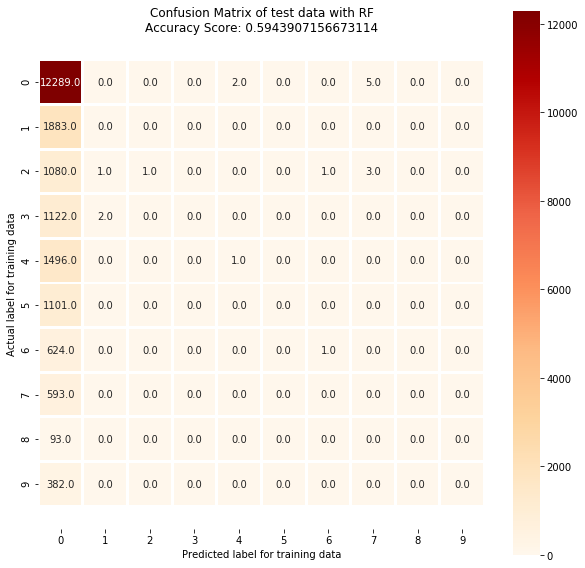

In [0]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix for the MLP model
confusion_matrix_rf = confusion_matrix(y_test, pred_label)

# plot the confusion matrix
plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix_rf, annot=True, fmt=".1f", linewidths=2, square = True, cmap="OrRd");
plt.ylabel('Actual label for training data');
plt.xlabel('Predicted label for training data');
plt.title('Confusion Matrix of test data with RF' '\nAccuracy Score: {0}'.format(rf_acc))
# adjust to show the top and bottom of the plot
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [0]:
# calculate the false postive event number, false negative event number, true positive event number and true negative event number for each class
FP = confusion_matrix_rf.sum(axis=0) - np.diag(confusion_matrix_rf)  
FN = confusion_matrix_rf.sum(axis=1) - np.diag(confusion_matrix_rf)
TP = np.diag(confusion_matrix_rf)
TN = confusion_matrix_rf.sum() - (FP + FN + TP)

In [0]:
recall_test = TP/(TP+FN)
recall_test

array([9.99430709e-01, 0.00000000e+00, 9.20810313e-04, 0.00000000e+00,
       6.68002672e-04, 0.00000000e+00, 1.60000000e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [0]:
X_train = transformed.values[1:round(len(transformed.values)*0.8)+1,:]
X_test = transformed.values[round(len(transformed.values)*0.8)+1:,:]
y_train = res["kmeans_cluster"][:round(len(transformed.values)*0.8)]
y_test = res["kmeans_cluster"][round(len(transformed.values)*0.8):]

In [0]:
SMA_new = SMA.iloc[1:,1:].values

In [0]:
scaler_SMA = preprocessing.StandardScaler().fit(SMA_new)
SMA_std = scaler_SMA.transform(SMA_new)

In [0]:
X_train = SMA_new[1:round(len(SMA_new)*0.4)+1,:]
X_test = SMA_new[round(len(SMA_new)*0.4)+1:round(len(SMA_new)*0.6)+1,:]
y_train = res["kmeans_cluster"][:round(len(SMA_new)*0.4)]
y_test = res["kmeans_cluster"][round(len(SMA_new)*0.4):round(len(SMA_new)*0.6)]

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=40,n_estimators=120)
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, cv = 5,n_iter = 25, verbose=2, random_state=42, n_jobs = -1)
rf.fit(X_train, y_train)
# obtain the accuracy for the entire training set
#rf_acc = rf_random.score(X_train, y_train)
#rf_acc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf.score(X_train, y_train)

0.9999758226348493

In [0]:
pred_label = rf.predict(X_test)
rf_acc = rf.score(X_test, y_test)
rf_acc

0.6600744644843093

In [0]:
ls = np.linspace(5,round(len(SMA_new)*0.2),100)
ls = [int(i) for i in ls]

In [0]:
rf_res = []
for i in ls:
  pred_label = rf.predict(X_test[:i])
  rf_res.append(rf.score(X_test[:i], y_test[:i]))

Text(0, 0.5, 'Prediction accuracy')

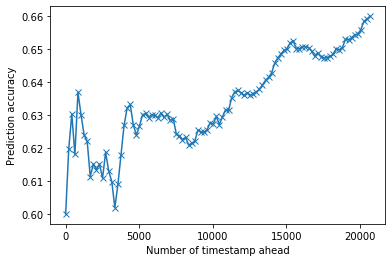

In [0]:
plt.plot(ls,rf_res,marker = "x")
plt.xlabel("Number of timestamp ahead")
plt.ylabel("Prediction accuracy")

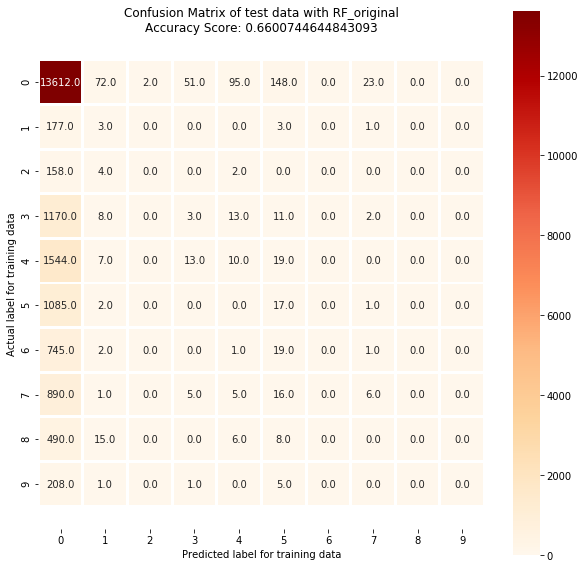

In [0]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix for the MLP model
confusion_matrix_rf = confusion_matrix(y_test, pred_label)

# plot the confusion matrix
plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix_rf, annot=True, fmt=".1f", linewidths=2, square = True, cmap="OrRd");
plt.ylabel('Actual label for training data');
plt.xlabel('Predicted label for training data');
plt.title('Confusion Matrix of test data with RF_original' '\nAccuracy Score: {0}'.format(rf_acc))
# adjust to show the top and bottom of the plot
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [0]:
# calculate the false postive event number, false negative event number, true positive event number and true negative event number for each class
FP = confusion_matrix_rf.sum(axis=0) - np.diag(confusion_matrix_rf)  
FN = confusion_matrix_rf.sum(axis=1) - np.diag(confusion_matrix_rf)
TP = np.diag(confusion_matrix_rf)
TN = confusion_matrix_rf.sum() - (FP + FN + TP)

In [0]:
recall_test = TP/(TP+FN)
recall_test

array([0.97207741, 0.01630435, 0.        , 0.0024855 , 0.00627746,
       0.01538462, 0.        , 0.00650054, 0.        , 0.        ])

In [0]:
clean_data_new = clean_data.iloc[res['Index'],:-1]

In [0]:
scaler_data = preprocessing.StandardScaler().fit(clean_data_new)
data_std = scaler_data.transform(clean_data_new)

In [0]:
len(clean_data_new.columns)

362

In [0]:
len(res['Index'])

103403

In [0]:
X_train = data_std[1:round(len(data_std)*0.4)+1,:]
X_test = data_std[round(len(data_std)*0.4)+1:round(len(data_std)*0.6)+1,:]
y_train = res["kmeans_cluster"][:round(len(data_std)*0.4)]
y_test = res["kmeans_cluster"][round(len(data_std)*0.4):round(len(data_std)*0.6)]

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=40,n_estimators=120)
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, cv = 5,n_iter = 25, verbose=2, random_state=42, n_jobs = -1)
rf.fit(X_train, y_train)
# obtain the accuracy for the entire training set
#rf_acc = rf_random.score(X_train, y_train)
#rf_acc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf.score(X_train, y_train)

0.999903290539397

In [0]:
pred_label = rf.predict(X_test)
rf_acc = rf.score(X_test, y_test)
rf_acc

0.6772399787244331

In [0]:
round(len(transformed.values)*0.2)

20681

In [0]:
ls = np.linspace(5,round(len(transformed.values)*0.2),100)
ls = [int(i) for i in ls]

In [0]:
rf_res = []
for i in ls:
  pred_label = rf.predict(X_test[:i])
  rf_res.append(rf.score(X_test[:i], y_test[:i]))

In [0]:
rf_res = pd.DataFrame(rf_res)
rf_res.to_csv('rf_prediction_acc.csv')

Text(0, 0.5, 'Prediction accuracy')

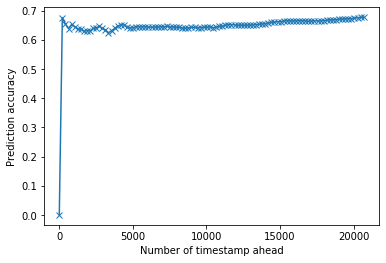

In [0]:
plt.plot(ls,rf_res,marker = "x")
plt.xlabel("Number of timestamp ahead")
plt.ylabel("Prediction accuracy")

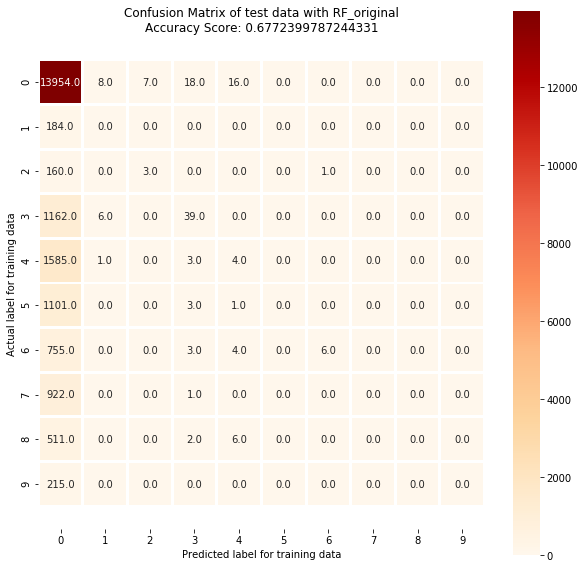

In [0]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix for the MLP model
confusion_matrix_rf = confusion_matrix(y_test, pred_label)

# plot the confusion matrix
plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix_rf, annot=True, fmt=".1f", linewidths=2, square = True, cmap="OrRd");
plt.ylabel('Actual label for training data');
plt.xlabel('Predicted label for training data');
plt.title('Confusion Matrix of test data with RF_original' '\nAccuracy Score: {0}'.format(rf_acc))
# adjust to show the top and bottom of the plot
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [0]:
# calculate the false postive event number, false negative event number, true positive event number and true negative event number for each class
FP = confusion_matrix_rf.sum(axis=0) - np.diag(confusion_matrix_rf)  
FN = confusion_matrix_rf.sum(axis=1) - np.diag(confusion_matrix_rf)
TP = np.diag(confusion_matrix_rf)
TN = confusion_matrix_rf.sum() - (FP + FN + TP)

In [0]:
recall_test = TP/(TP+FN)
recall_test

array([0.99650075, 0.        , 0.01829268, 0.03231152, 0.00251099,
       0.        , 0.0078125 , 0.        , 0.        , 0.        ])

# CNN

In [0]:
SMA.shape

(103404, 363)

In [0]:
SMA_new = SMA.iloc[:,1:].values

In [0]:
len(res["kmeans_cluster"])

103403

In [0]:
len(SMA_new[0:250,:])

250

In [0]:
round(len(SMA_new)*0.8) + round(len(SMA_new)*0.2)

103404

In [0]:
len(SMA_new)

103404

In [0]:
round(len(SMA_new)*0.035)

3619

In [0]:
round(len(SMA_new)*0.01)

1034

In [0]:
X_train = []
y_train = []
for i in range(0,round(len(SMA_new)*0.035)):
  X_train.append(list(SMA_new[i:250+i,:].flatten()))
  y_train.append(res["kmeans_cluster"][250+i])

In [0]:
num = round(len(SMA_new)*0.8)
X_test = []
y_test = []
for i in range(0,round(len(SMA_new)*0.01)):
  X_test.append(list(SMA_new[num:250+num,:].flatten()))
  y_test.append(res["kmeans_cluster"][num+250+i])

In [0]:
# import necessary packages 
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

In [0]:
# define hyperparameter values
input_size = 250*362
num_classes = 10
#num_epochs = 30
batch_size = 128
num_epochs = 15
#batch_size = 100
learning_rate = 0.005

In [0]:
# prepare data
X_train_CNN = torch.from_numpy(np.array(X_train)).float()
y_train_CNN = torch.from_numpy(np.array(y_train)).float()
X_test_CNN = torch.from_numpy(np.array(X_test)).float()
y_test_CNN = torch.from_numpy(np.array(y_test)).float()

In [0]:
# loading data 
train = torch.utils.data.TensorDataset(X_train_CNN, y_train_CNN)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)

test = torch.utils.data.TensorDataset(X_test_CNN, y_test_CNN)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)

In [0]:
# define the CNN model
class ConvNet(nn.Module):
    def __init__(self,num_classes):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 3, kernel_size=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1))
        self.fc1 = nn.Linear(125 * 181 * 6, num_classes)
        #self.fc2 = nn.Linear(22620, 1000)
        #self.fc3 = nn.Linear(1000, num_classes)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        #out = F.relu(self.fc1(out))
        #out = F.relu(self.fc2(out))
        out = self.fc1(out)
        return out

In [0]:
net_CNN = ConvNet(num_classes)

In [0]:
# define loss functions
criterion = nn.NLLLoss()
m =nn.LogSoftmax(dim=1)

# define optimisation method 
optimiser = torch.optim.SGD(net_CNN.parameters(), lr=learning_rate)  

In [0]:
# set up the function to train the model
def trainCNN(network,criterion,optimiser,train_loader):
  network.train()
  loss_values = []
  network = network.float()
  for epoch in range(num_epochs):

  # train the model 
    train_loss = 0
  
    for i,(images, labels) in enumerate(train_loader,0):
      images=images.reshape(-1,1,250,362)
      optimiser.zero_grad()
    # forward pass
      outputs = network(images.float())
      loss = criterion(m(outputs), labels.long())
        
    # backward and optimise
      loss.backward()
      optimiser.step()
      train_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(epoch+1, train_loss/len(train_loader)))
    loss_values.append(train_loss / 100)

  print('Finished Training')
  return loss_values

In [0]:
loss_values_CNN = trainCNN(net_CNN,criterion,optimiser,train_loader)

Epoch 1 - Training loss: 131277.9664247447
Epoch 2 - Training loss: 2.2508986160672944
Epoch 3 - Training loss: 2.2159611767735976
Epoch 4 - Training loss: 2.1821669052387107
Epoch 5 - Training loss: 2.14953797439049
Epoch 6 - Training loss: 2.1180915174813104
Epoch 7 - Training loss: 2.0878417902979356
Epoch 8 - Training loss: 2.0587968867400597
Epoch 9 - Training loss: 2.030962713833513
Epoch 10 - Training loss: 2.004336817511197
Epoch 11 - Training loss: 1.9789144910615066
Epoch 12 - Training loss: 1.9546850673083602
Epoch 13 - Training loss: 1.9316336245372379
Epoch 14 - Training loss: 1.909741660644268
Epoch 15 - Training loss: 1.8889848733770436
Finished Training


In [0]:
print (loss_values_CNN)

[1419822637.2046735, 0.2066207695007324, 0.20621533155441285]


In [0]:
# define the function test the neural network
def testCNN_prob(network,test_loader):
  network.eval()
  correct = 0
  total = 0
  pred = []
  actual = []
  prob = []
  network = network.float()
  for i,(images, labels) in enumerate(test_loader,0):
    images=images.reshape(-1,1,250,362)
    labels = labels
    outputs = network(images.float())
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    pred.extend(predicted.numpy())
    actual.extend(labels.numpy())
    sm = torch.nn.Softmax()
    probability = sm(outputs).detach().numpy().tolist()
    prob.extend(probability) 
    
# return the percentage of correct predictions, the predicted labels and the actual labels
  return correct / total,pred,actual,prob

In [0]:
acc_CNN,pred_label_CNN,actual_label_CNN,prob_CNN = testCNN_prob(net_CNN,test_loader)
acc_CNN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.6034816247582205

In [0]:
acc_CNN

0.6034816247582205

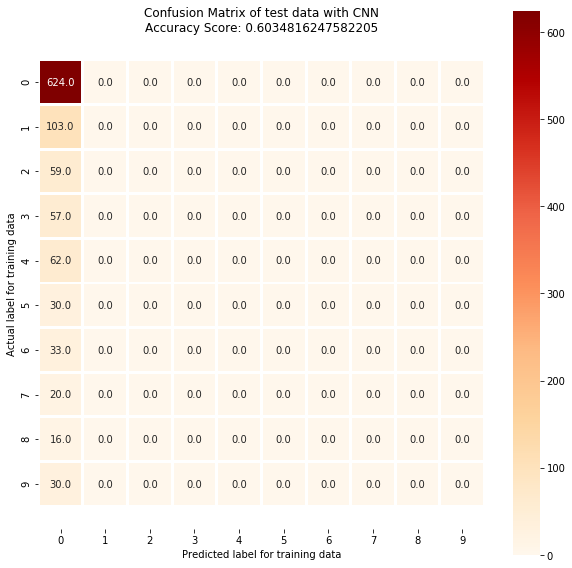

In [0]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix for the MLP model
confusion_matrix_rf = confusion_matrix(actual_label_CNN, pred_label_CNN)

# plot the confusion matrix
plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix_rf, annot=True, fmt=".1f", linewidths=2, square = True, cmap="OrRd");
plt.ylabel('Actual label for training data');
plt.xlabel('Predicted label for training data');
plt.title('Confusion Matrix of test data with CNN' '\nAccuracy Score: {0}'.format(acc_CNN))
# adjust to show the top and bottom of the plot
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [0]:
#acc_CNN = pd.DataFrame(acc_CNN)
pred_label_CNN = pd.DataFrame(pred_label_CNN)
actual_label_CNN = pd.DataFrame(actual_label_CNN)
prob_CNN = pd.DataFrame(prob_CNN)

In [0]:
acc_CNN.to_csv('CNN_acc.csv')
pred_label_CNN.to_csv('CNN_pred_label.csv')
actual_label_CNN.to_csv('CNN_actual_label.csv')
prob_CNN.to_csv('CNN_prob.csv')